# Usecase-1: Pump & Tank surveillance

The objective was to proactively initiate the process of pump or tank inspection and maintenance.
There could be several reasons for not getting the required amount of water in the rooftop tank such as pump operational failure, or piping or valve or water tank leakages etc. 

When the pump did not deliver the required volume of water, it was evident that the pump was consuming more wattage of electrical power but doing lesser work and also it was an inconvenience for the building occupants as the water got over faster. In case of some leakage problem in pipes, valves and tank etc. electricity and water both of the essential resources were wasted which cost a great monetary sum in long run.

By creating this model, we have helped our client to take proactive measures which was exteremely benificial. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the Excel file to an object
df = pd.read_excel('Use_case-1-Water_tank_and_pump_surveillance-Latest-Himanshu Raul.xlsx')

In [3]:
df.head()

,Sl.no.,case id,mismatch in water volume per day (ltr),last maintenance of pump (days),last maintenance of piping (days),last maintenance of tank (days),maintenance required (YES or NO),staff_id on duty
0,1,YA-001,33,68.0,94.0,95.0,NO,EN-04-SE-0023
1,2,YA-002,60,214.0,317.0,NaN,YES,EN-04-SE-0509
2,3,YA-003,26,189.0,305.0,306.0,NO,EN-04-SE-0089
3,4,YA-004,90,173.0,143.0,148.0,YES,EN-04-SE-0214
4,5,YA-005,29,98.0,NaN,126.0,NO,EN-04-SE-0214


In [4]:
#Checking for Null values and other info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Sl.no.                                  50 non-null     int64  
 1   case id                                 50 non-null     object 
 2   mismatch in water volume per day (ltr)  50 non-null     int64  
 3   last maintenance of pump (days)         46 non-null     float64
 4   last maintenance of piping (days)       46 non-null     float64
 5   last maintenance of tank (days)         44 non-null     float64
 6   maintenance required (YES or NO)        50 non-null     object 
 7   staff_id on duty                        50 non-null     object 
dtypes: float64(3), int64(2), object(3)
memory usage: 3.2+ KB


In [5]:
#Taking care of Null values.
df['last maintenance of pump (days)'] = df['last maintenance of pump (days)'].fillna(df['last maintenance of pump (days)'].mean())
df['last maintenance of pump (days)']=df['last maintenance of pump (days)'].astype(int)

df['last maintenance of piping (days)'] = df['last maintenance of piping (days)'].fillna(df['last maintenance of piping (days)'].mean())
df['last maintenance of piping (days)']=df['last maintenance of piping (days)'].astype(int)

df['last maintenance of tank (days)'] = df['last maintenance of tank (days)'].fillna(df['last maintenance of tank (days)'].mean())
df['last maintenance of tank (days)']=df['last maintenance of tank (days)'].astype(int)

In [6]:
#We can verify in info if we still have any Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Sl.no.                                  50 non-null     int64 
 1   case id                                 50 non-null     object
 2   mismatch in water volume per day (ltr)  50 non-null     int64 
 3   last maintenance of pump (days)         50 non-null     int32 
 4   last maintenance of piping (days)       50 non-null     int32 
 5   last maintenance of tank (days)         50 non-null     int32 
 6   maintenance required (YES or NO)        50 non-null     object
 7   staff_id on duty                        50 non-null     object
dtypes: int32(3), int64(2), object(3)
memory usage: 2.7+ KB


In [7]:
#Converting the target column into numeric.
num = pd.get_dummies(df['maintenance required (YES or NO)'],drop_first=True)

In [8]:
df = pd.concat([df,num],axis=1)

In [9]:
df.head()

,Sl.no.,case id,mismatch in water volume per day (ltr),last maintenance of pump (days),last maintenance of piping (days),last maintenance of tank (days),maintenance required (YES or NO),staff_id on duty,YES
0,1,YA-001,33,68,94,95,NO,EN-04-SE-0023,0
1,2,YA-002,60,214,317,242,YES,EN-04-SE-0509,1
2,3,YA-003,26,189,305,306,NO,EN-04-SE-0089,0
3,4,YA-004,90,173,143,148,YES,EN-04-SE-0214,1
4,5,YA-005,29,98,242,126,NO,EN-04-SE-0214,0


In [10]:
#Dropping the unwanted columns. 
df.drop(['Sl.no.','case id','maintenance required (YES or NO)','staff_id on duty'], axis=1, inplace=True)

In [11]:
df.head()

,mismatch in water volume per day (ltr),last maintenance of pump (days),last maintenance of piping (days),last maintenance of tank (days),YES
0,33,68,94,95,0
1,60,214,317,242,1
2,26,189,305,306,0
3,90,173,143,148,1
4,29,98,242,126,0


In [12]:
#Renaming the column names into a standard format by removing spaces etc. 
df.columns = ['mismatch_in_water_volume_per_day_(ltr)',
                    'last_maintenance_of_pump_(days)','last_maintenance_of_piping_(days)',
                   'last_maintenance_of_tank_(days)','maintenance_required_(0/1)']

In [13]:
#Checking the final dataframe to be processed by the algorithm
df.head()

,mismatch_in_water_volume_per_day_(ltr),last_maintenance_of_pump_(days),last_maintenance_of_piping_(days),last_maintenance_of_tank_(days),maintenance_required_(0/1)
0,33,68,94,95,0
1,60,214,317,242,1
2,26,189,305,306,0
3,90,173,143,148,1
4,29,98,242,126,0


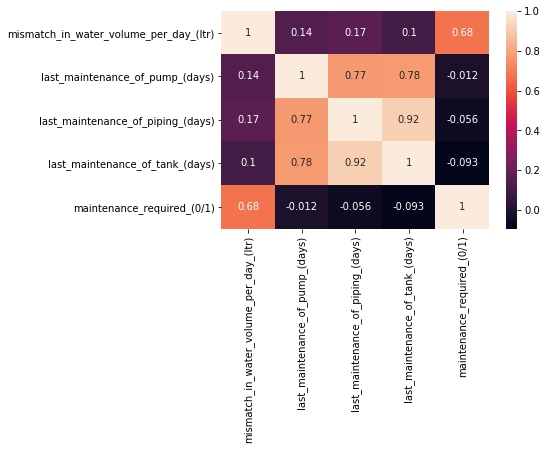

In [14]:
#Checking the correlation with the help of a Seaborn Heatmap
sns.heatmap(df.corr(), annot=True)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#Preparing the x and y value for train-test-split and the ML algorithm
x = df.drop('maintenance_required_(0/1)', axis=1)
x.head()

,mismatch_in_water_volume_per_day_(ltr),last_maintenance_of_pump_(days),last_maintenance_of_piping_(days),last_maintenance_of_tank_(days)
0,33,68,94,95
1,60,214,317,242
2,26,189,305,306
3,90,173,143,148
4,29,98,242,126


In [17]:
y = df['maintenance_required_(0/1)']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: maintenance_required_(0/1), dtype: uint8

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=4)

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
lr = LogisticRegression()

In [115]:
#Fitting the train data into the model
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
#Predicting the test output
y_pred = lr.predict(x_test)

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [118]:
confusion_matrix(y_test, y_pred)

array([[10,  0],
       [ 1,  4]], dtype=int64)

In [119]:
#Checking for accuracy
accuracy_score(y_test, y_pred)

0.9333333333333333

Conclusion: We have acheived a good level of accuracy for the model with the help of Logistic Regression. 